Let's load some libraries. The `datetime` module supplies classes for manipulating dates and times and comes with the standard Python library.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, timedelta

In [2]:
# Ensures reproducibility of random numbers
rng = np.random.default_rng(1234)

Let's consider a dataset with 3 variables:

* **date**
* **temperature**: the first series to display. Ranges from 0 to 10.
* **price**: the second series to display. Ranges from 20 to 120.

In [3]:
# timedelta(i) adds "i" days to the 1st of January of 2019
date = [datetime(2019, 1, 1) + timedelta(i) for i in range(100)]
temperature = np.arange(100) ** 2.5 / 10000 + rng.uniform(size=100)
price = np.arange(120, 20, -1) ** 1.5 / 10 + rng.uniform(size=100)

One could easily build 2 line charts to study the evolution of those 2 series using the code below.

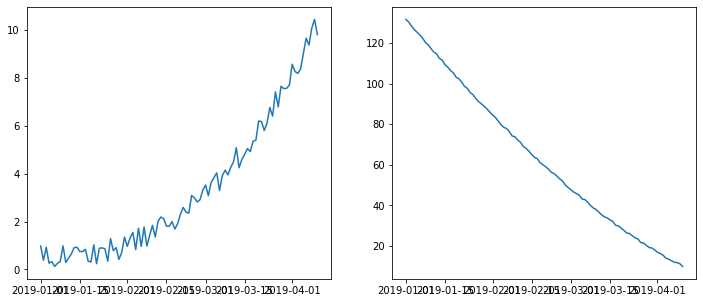

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(date, temperature)
axes[1].plot(date, price);

But even if [strongly unadvised](https://www.data-to-viz.com/caveats.html), one sometimes wants to display both series on the same chart, thus needing a second Y axis.

## Create a new twin Axis sharing the x axis with `ax.twinx()`: the idea

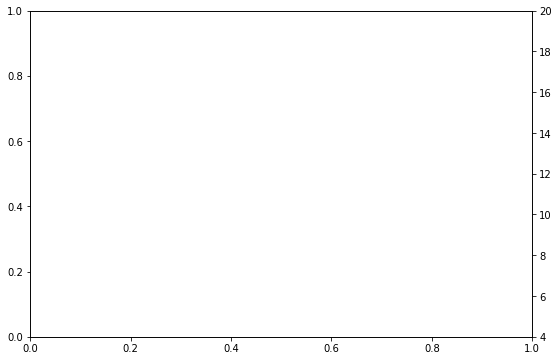

In [5]:
fig, ax1 = plt.subplots(figsize=(9, 6))

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
ax2.set_ylim(4, 20);

As can be seen above, the Y axis on the left goes from 0 to 1, while the Y axis on the right goes from 4 to 20. These limits are adjusted automatically when we pass data. 

Note that since both Y axes are independent, you can easily set any custom limit on the secondary Y axis.

## Show 2 series on the same line chart thanks to `ax.twinx()`

`ax.twinx()` returns an Axis instance that can be used just as any other Matplotlib Axis. The only particularity of this new Axis is that it shares the horizontal axis with the first one.

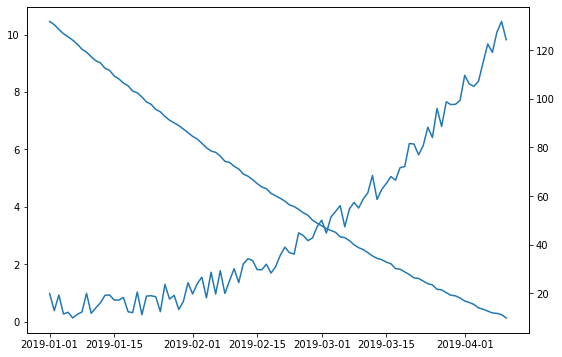

In [6]:
fig, ax1 = plt.subplots(figsize=(9, 6))
ax2 = ax1.twinx()

ax1.plot(date, temperature)
ax2.plot(date, price);

## Dual Y axis customization with Matplotlib

Let's add some details to make the chart look better:

* Use distinctive colors for lines and labels.
* Make lines thicker.
* Add axis labels.
* Add title
* Format date labels on the horizontal axis.

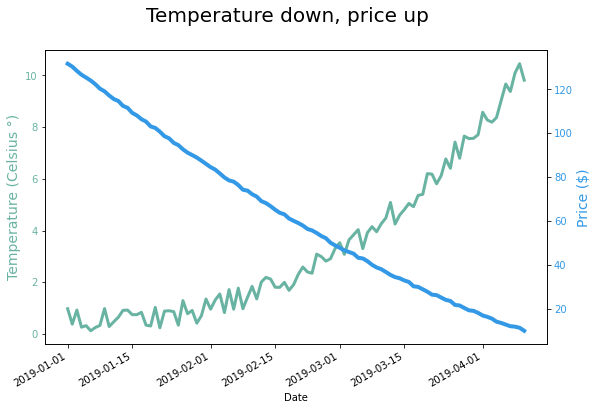

In [7]:
COLOR_TEMPERATURE = "#69b3a2"
COLOR_PRICE = "#3399e6"

fig, ax1 = plt.subplots(figsize=(9, 6))
ax2 = ax1.twinx()

ax1.plot(date, temperature, color=COLOR_TEMPERATURE, lw=3)
ax2.plot(date, price, color=COLOR_PRICE, lw=4)

ax1.set_xlabel("Date")
ax1.set_ylabel("Temperature (Celsius °)", color=COLOR_TEMPERATURE, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_TEMPERATURE)

ax2.set_ylabel("Price ($)", color=COLOR_PRICE, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_PRICE)

fig.suptitle("Temperature down, price up", fontsize=20)
fig.autofmt_xdate()

## Barplot with overlapping line chart

It's also possible to use the same tricks with other types of plots. Here is an example displaying a line chart on top of a barplot.

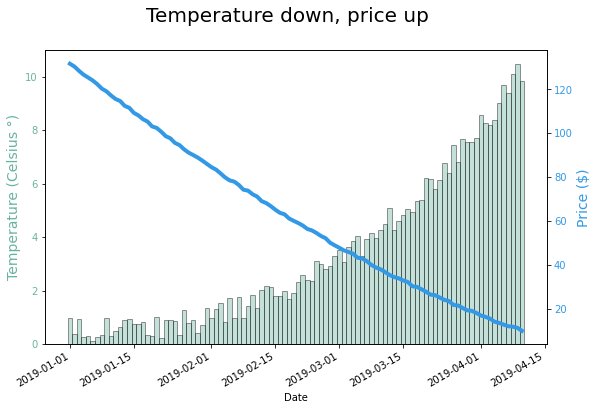

In [8]:
fig, ax1 = plt.subplots(figsize=(9, 6))
ax2 = ax1.twinx()

ax1.bar(date, temperature, color=COLOR_TEMPERATURE, edgecolor="black", alpha=0.4, width=1.0)
ax2.plot(date, price, color=COLOR_PRICE, lw=4)

ax1.set_xlabel("Date")
ax1.set_ylabel("Temperature (Celsius °)", color=COLOR_TEMPERATURE, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_TEMPERATURE)

ax2.set_ylabel("Price ($)", color=COLOR_PRICE, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_PRICE)

fig.autofmt_xdate()
fig.suptitle("Temperature down, price up", fontsize=20);

The following is a trick to set transparency only on the color of the fill and not on the edge:

In [9]:
from matplotlib import colors

# Convert color to RGBA
color = list(colors.to_rgba(COLOR_TEMPERATURE))

# Set opacity level in the A channel to something smaller than 1 (but larger than 0)
color[3] = 0.4

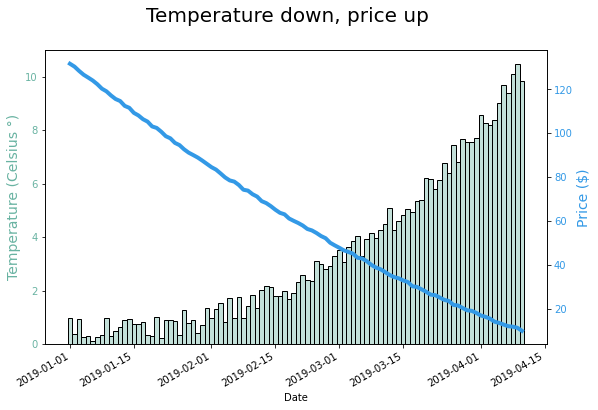

In [10]:
fig, ax1 = plt.subplots(figsize=(9, 6))
ax2 = ax1.twinx()

ax1.bar(date, temperature, color=color, edgecolor="black", width=1.0)
ax2.plot(date, price, color=COLOR_PRICE, lw=4)

ax1.set_xlabel("Date")
ax1.set_ylabel("Temperature (Celsius °)", color=COLOR_TEMPERATURE, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_TEMPERATURE)

ax2.set_ylabel("Price ($)", color=COLOR_PRICE, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_PRICE)

fig.autofmt_xdate()
fig.suptitle("Temperature down, price up", fontsize=20);